**多层感知机的从零开始实现**

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

g_batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(g_batch_size)

In [2]:
g_num_inputs, g_num_outputs, g_num_hiddens = 28 * 28, 10, 256

# 输入层参数，inputs 个输入神经元，hiddens 个隐藏层神经元
W1 = nn.Parameter(
    torch.randn(g_num_inputs, g_num_hiddens, requires_grad = True) * 0.01
)
b1 = nn.Parameter(torch.zeros(g_num_hiddens, requires_grad = True))

# 隐藏层参数，hiddens 个隐藏层神经元，output 个输出类别
W2 = nn.Parameter(
    torch.randn(g_num_hiddens, g_num_outputs, requires_grad = True)
)
b2 = nn.Parameter(torch.zeros(g_num_outputs, requires_grad = True))

params = [W1, b1, W2, b2]

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
def clf(X):
    X = X.reshape((-1, g_num_inputs))

    hidden_layer = relu(torch.matmul(X, W1) + b1)
    output_layer = torch.matmul(hidden_layer, W2) + b2

    return output_layer

In [5]:
loss = nn.CrossEntropyLoss(reduction="none")

In [6]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [8]:
from utils.model_tools import train

num_epochs, lr = 10, .01
result = train(clf, train_iter, test_iter, loss, num_epochs, 
                  lambda g_batch_size : d2l.sgd(params, lr, g_batch_size))

Text(0, 0.5, 'accuracy (%)')

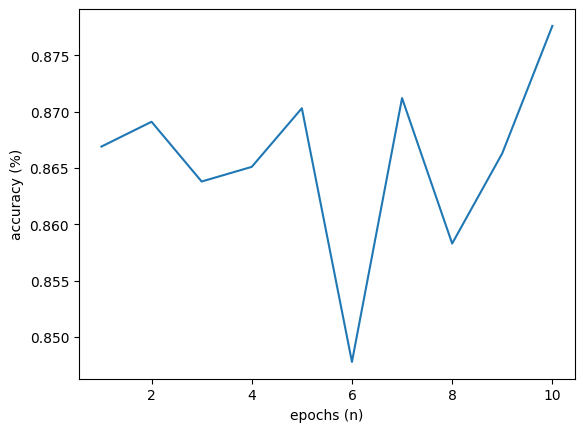

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10 + 1), result)
plt.xlabel("epochs (n)")
plt.ylabel("accuracy (%)")

In [12]:
def predict(clf, test_iter, n):
    for X, y in test_iter:
        break
    
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(clf(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

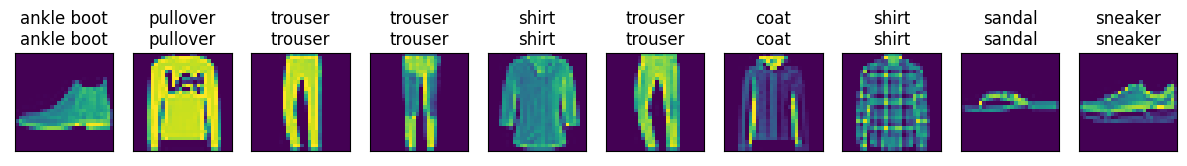

In [14]:
predict(clf, test_iter, 10)

**高级API实现多层感知机**

In [15]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
clf = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

def init_params(model):
    if type(model) == nn.Linear:
        nn.init.normal_(model.weight, std=.01)
        
clf.apply(init_params)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
res = train(clf, train_iter, test_iter, loss, num_epochs, 
            lambda num_epochs : torch.optim.SGD(params, lr, g_batch_size))